# Árboles de Decisión

Antes de avanzar con los **Árboles de Decisión**, nos ubiquemos en el mapa.

El Machine Learning se aplica de *tres maneras* diferentes:
- El Aprendizaje Supervisado
- El Aprendizaje no Supervisado
- El Aprendizaje por Reforzamiento

El **Aprendizaje Supervisado** (que es un modelo que puede hacer predicciones sobre nuevos datos en base a lo aprendido en el entrenamiento con datos etiquetados), se puede aplicar usando *4 algoritmos* distintos:

* Regresión Lineal
* Regresión Logística
* Árboles de Decisión
* Bosques Aleatorios

En las lecciones anteriores hemos aprendido a hacer **Regresión Lineal** y **Regresión Logística**, por lo que en esta lección nos toca ver el tercer algoritmo: los **Árboles de Decisión**.

Los dos algoritmos que hemos visto hasta ahora, son algoritmos de *regresión*. ¿Qué significa eso? Que su tarea consiste en predecir un valor numérico (un precio, una probabilidad, etc.). Por eso ambos algoritmos tienen la palabra "*regresión*" en su nombre.

Pero no todos los algoritmos predicen *valores numéricos*. Algunos predicen *categorías*. Por ejemplo, pueden predecir si un email es normal, importante o spam, o predecir si el próximo vehículo que doble la esquina será un camión, un automóvil o una bicicleta.

El algoritmo del **Árbol de Decisión** es usado tanto para *regresión* como para *clasificación*, ya que nos permite predecir en qué categoría caerán los nuevos registros que se incorporen a nuestros datos, una vez que hayamos entrenado a nuestro modelo.

Un **Árbol de Decisión** es como un gran árbol de "*si/no*" donde cada pregunta divide los datos en nuevas ramas, basándose en sus características, hasta llegar a una predicción o conclusión al final de las ramas.

En el siguiente gráfico puedes ver un esquema muy resumido, donde tenemos una especie de árbol (pero de cabeza) donde comenzamos con una raíz de datos, a la que vamos dividiendo en grupos de datos según las preguntas que nos vayamos haciendo, hasta llegar a las hojas, que son los grupos definitivos en que vamos colocando a nuestros datos.

![CUADRO](arbol_decision.png)

El objetivo de este algoritmo es crear una especie de árbol que sea capaz de predecir lo más aproximadamente posible en qué categoría caerán los nuevos datos que ingresen al modelo. 

Veamos cómo crear un árbol de decisión directamente con un ejemplo.

Comencemos importando todas las librerías quevamos a necesitar para nuestro ejercicio. Ten presente que aquí hay muchas bibliotecas nuevas, a las cuales vas a ir viendo entrar en acción a medida que avancemos.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

Vamos a cargar una base de datos de ejemplo de Seaborn, que se llama "*iris*".

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


"*iris*" es una base de datos de Seaborn que contiene *150 registros* de flores de Iris. Como puedes ver, este dataset registra algunos aspectos de esas flores, como el **largo y el ancho de su sépalo** (que es la hoja verde que contiene al capullo), el **largo y el ancho de su pétalo**, y finalmente, a qué **especie** pertenece cada una de estas 150 flores de Iris.

Para conocer cuántas especies diferentes de Iris contiene este dataset, vamos a aplicar el método `unique()` a la columna `species`:

In [3]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Y así es como podemos ver que existen *3 especies* de flores Iris: **setosa**, **versicolor** y **virginica**.

Lo que quiero hacer ahora, es **entrenar un modelo** de Machine Learning, para que cuando encontremos una nueva flor, se pueda fijar en las características de sus sépalos y de sus pétalos, para definir de qué especie se trata. Y como este problema que quiero resolver implica anticipar una categoría, me vendría muy bien hacerlo con un **árbol de decisión**.

Para hacer árboles de decisión también tenemos que crear **conjuntos de entrenamiento y de prueba**, y luego entrenar al modelo, así que vamos por partes.

Primero vamos a definir las variables dependientes e independientes.

Las **variables independientes** son todos los datos de los pétalos y los sépalos. Entonces:

In [4]:
X = df.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


La **variable dependiente**, que es la que quiero averiguar, es la columna `species`.

Pero aquí tenemos un problema: esa columna contiene *strings* (ya que cada registro contiene las palabras "*setosa*", "*versicolor*" o "*virginica*"), por lo tanto tenemos que codificar esos valores para transformarlos en valores numéricos con los cuales el algoritmo pueda hacer sus cálculos.

Para eso, voy a usar una herramienta de Sci-kit Learn que se llama `LabelEncoder()` y que hemos importado al inicio de este cuaderno.

In [5]:
le = LabelEncoder()
especies = le.fit_transform(df["species"])
especies

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

El resultado ha sido un **array** que ha reemplazado los nombres de las especies por los valores **0**, **1**, o **2**, según corresponda, para cada uno de los 150 registros existentes en `df`.

Con esta transformación hecha, puedo definir la variable dependiente `y`.

In [6]:
y = especies

Ahora que tengo ambas variables, el paso siguiente es separar todos mis registros en **grupos de entrenamiento** y **grupos de prueba**, tal como hemos hecho hasta ahora:

In [7]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X,
                                                           y,
                                                           train_size=0.8,
                                                           random_state=42)

El parámetro `random_state` sirve para controlar la aleatoriedad con que se distribuyen los registros durante la división entre entrenamiento y prueba. Al proporcionar un número entero cualquiera a `random_state`, te aseguras que los resultados sean reproducibles; es decir, cada vez que se ejecute el código con ese mismo número, la división de los datos será siempre la misma.

Esto es útil para experimentos que necesitan ser reproducibles por ti o por otros, o cuando se está ajustando un modelo y se quiere que la división de los datos permanezca constante para comparar el rendimiento de diferentes parámetros del modelo. Siempre que pongas el mismo número entero, los registros se van a dividir de igual manera.

Ahora vamos a crear el objeto que contenga al modelo del **Árbol de Decisión**, al cual también hemos importado a este cuaderno.

In [8]:
arbol = DecisionTreeClassifier()

Y procedemos a **entrenar** al modelo:

In [9]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier()

Nuestro modelo ya está entrenado, por lo que estamos en condiciones de dibujar nuestro árbol. Para eso vamos a usar una herramienta de Sci-kit Learn que se llama `plot_tree`.

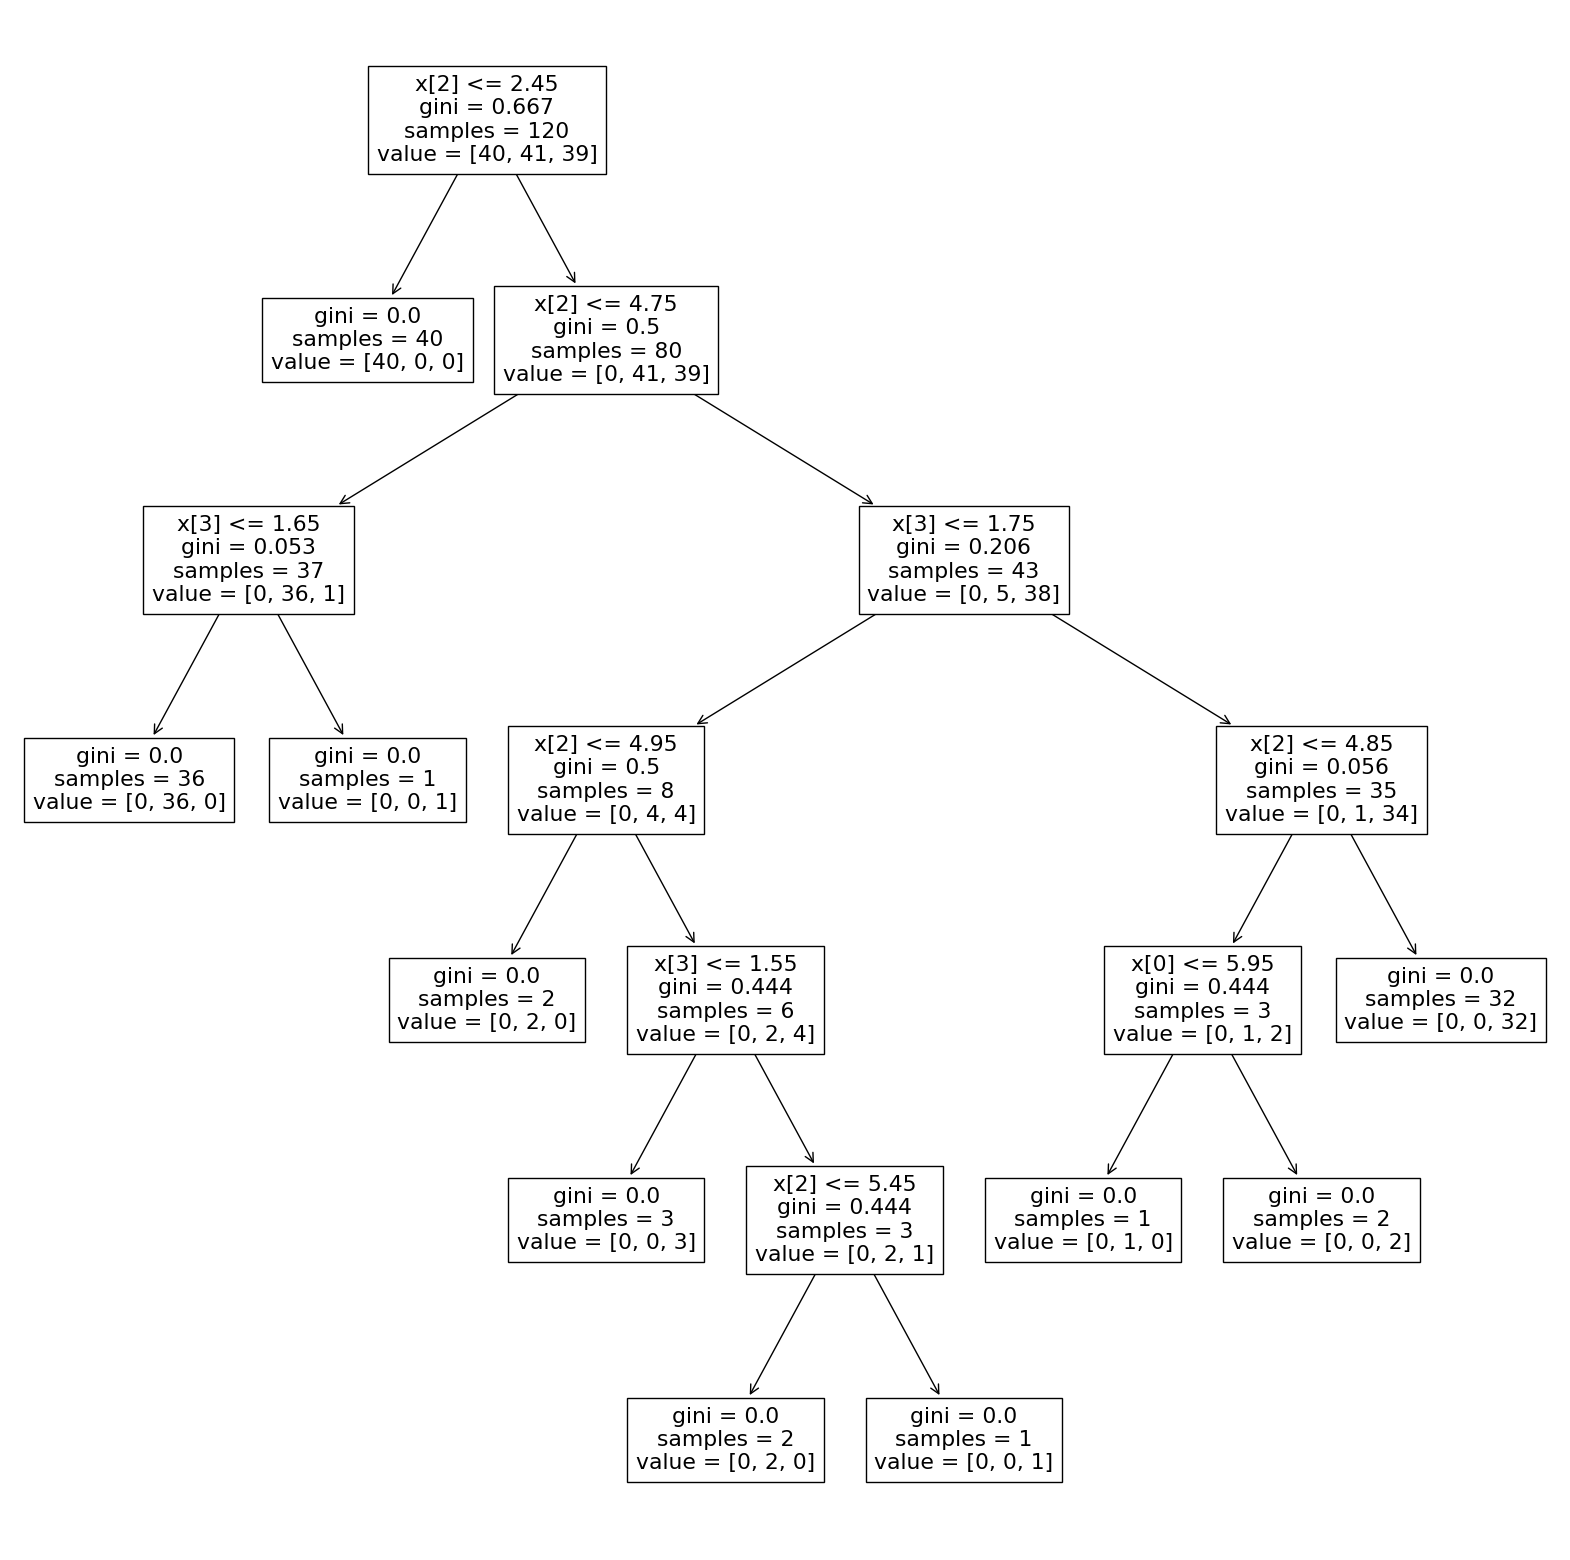

In [10]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol);

Como puedes ver, nuestro árbol es prácticamente imposible de leer, así que lo vamos a mejorar un poco, antes de interpretarlo.

Primero vamos a hacer que se vea más grande, por lo que vamos a necesitar la ayuda de **matplotlib**.

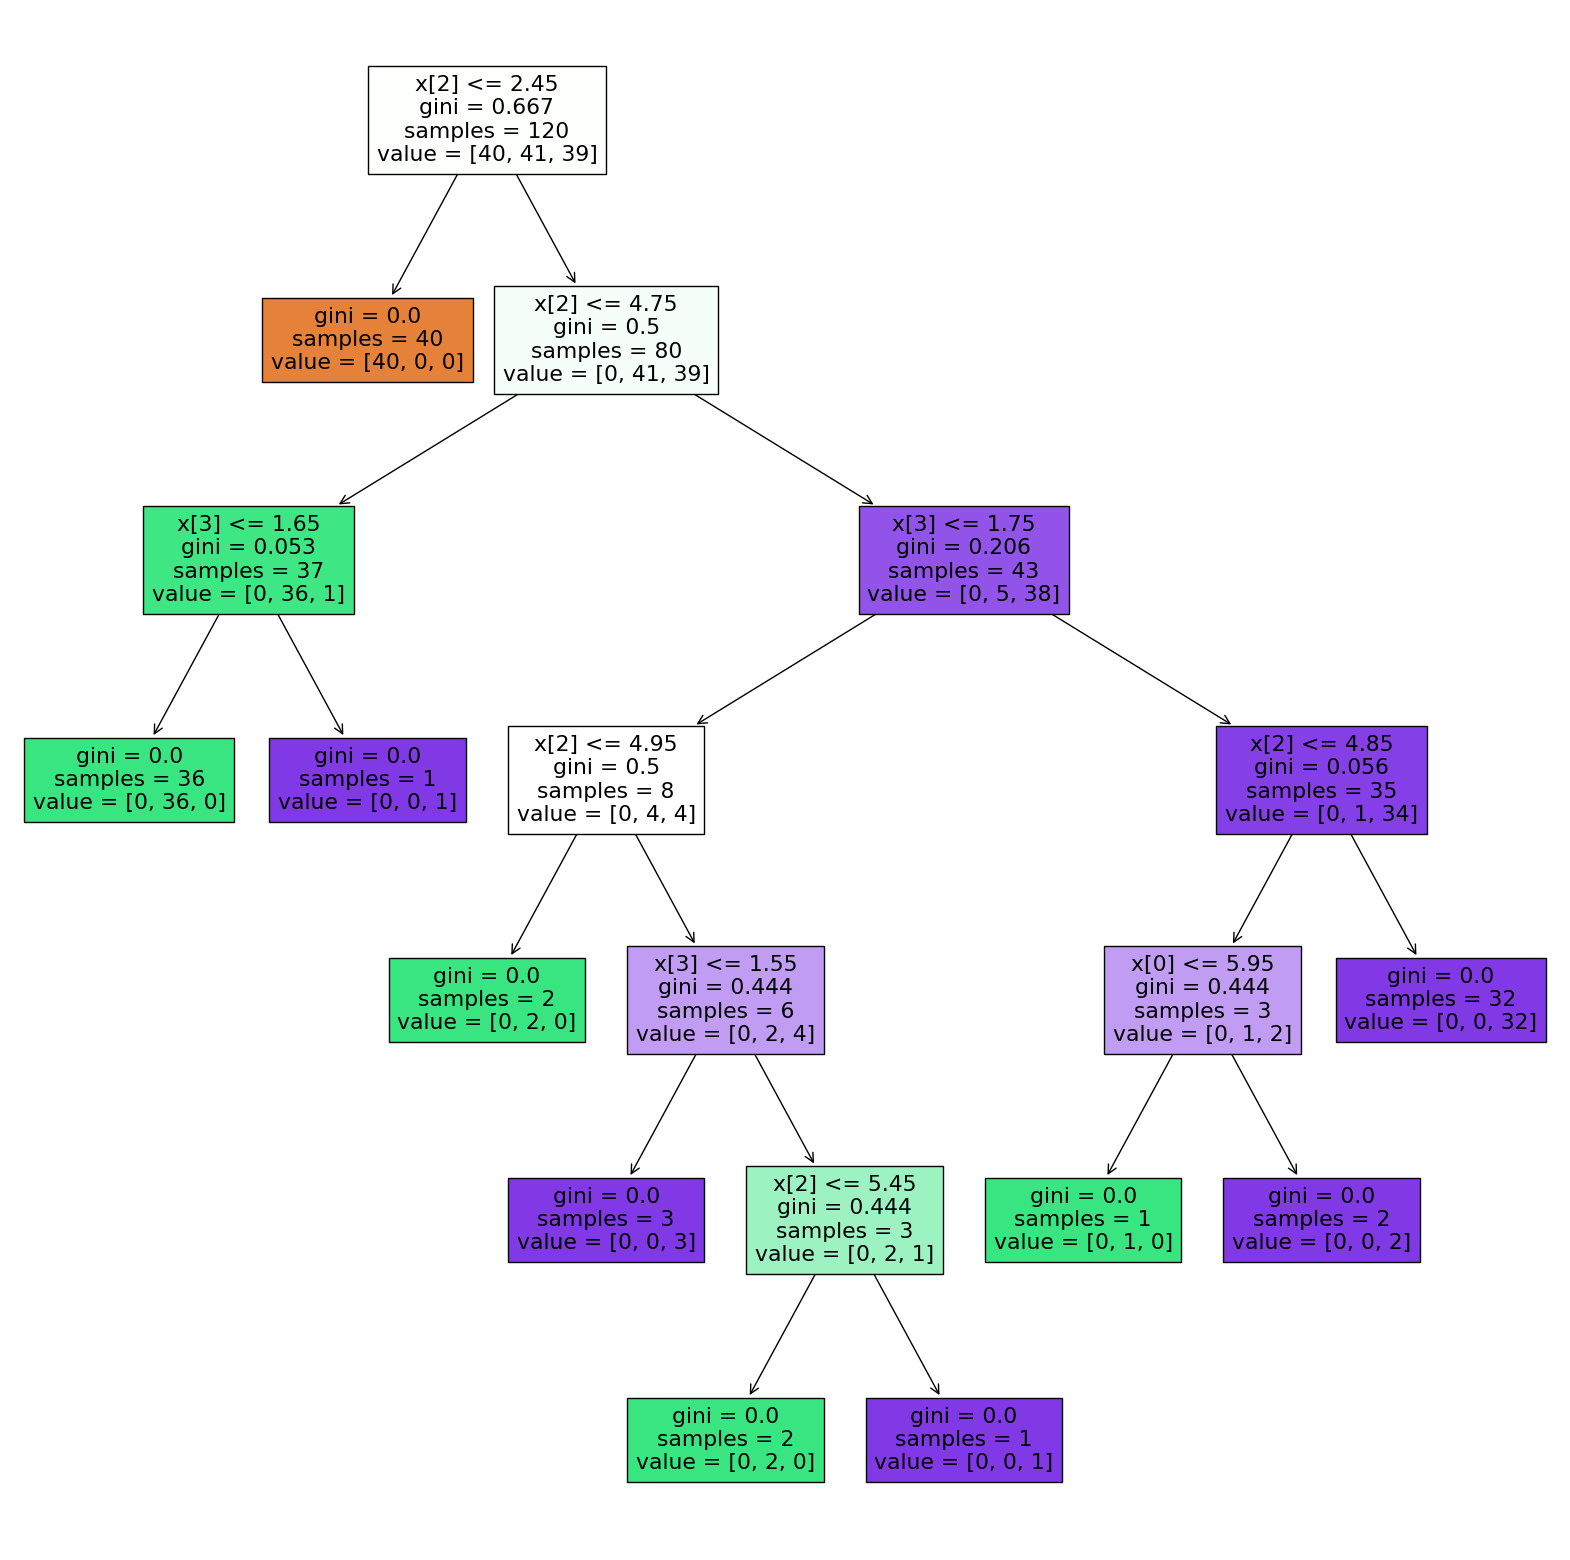

In [11]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
         filled=True);

Ahora si bien tenemos un árbol más grande, vamos a modificar algunos parámetros que nos van a ayudar a interpretarlo mejor:

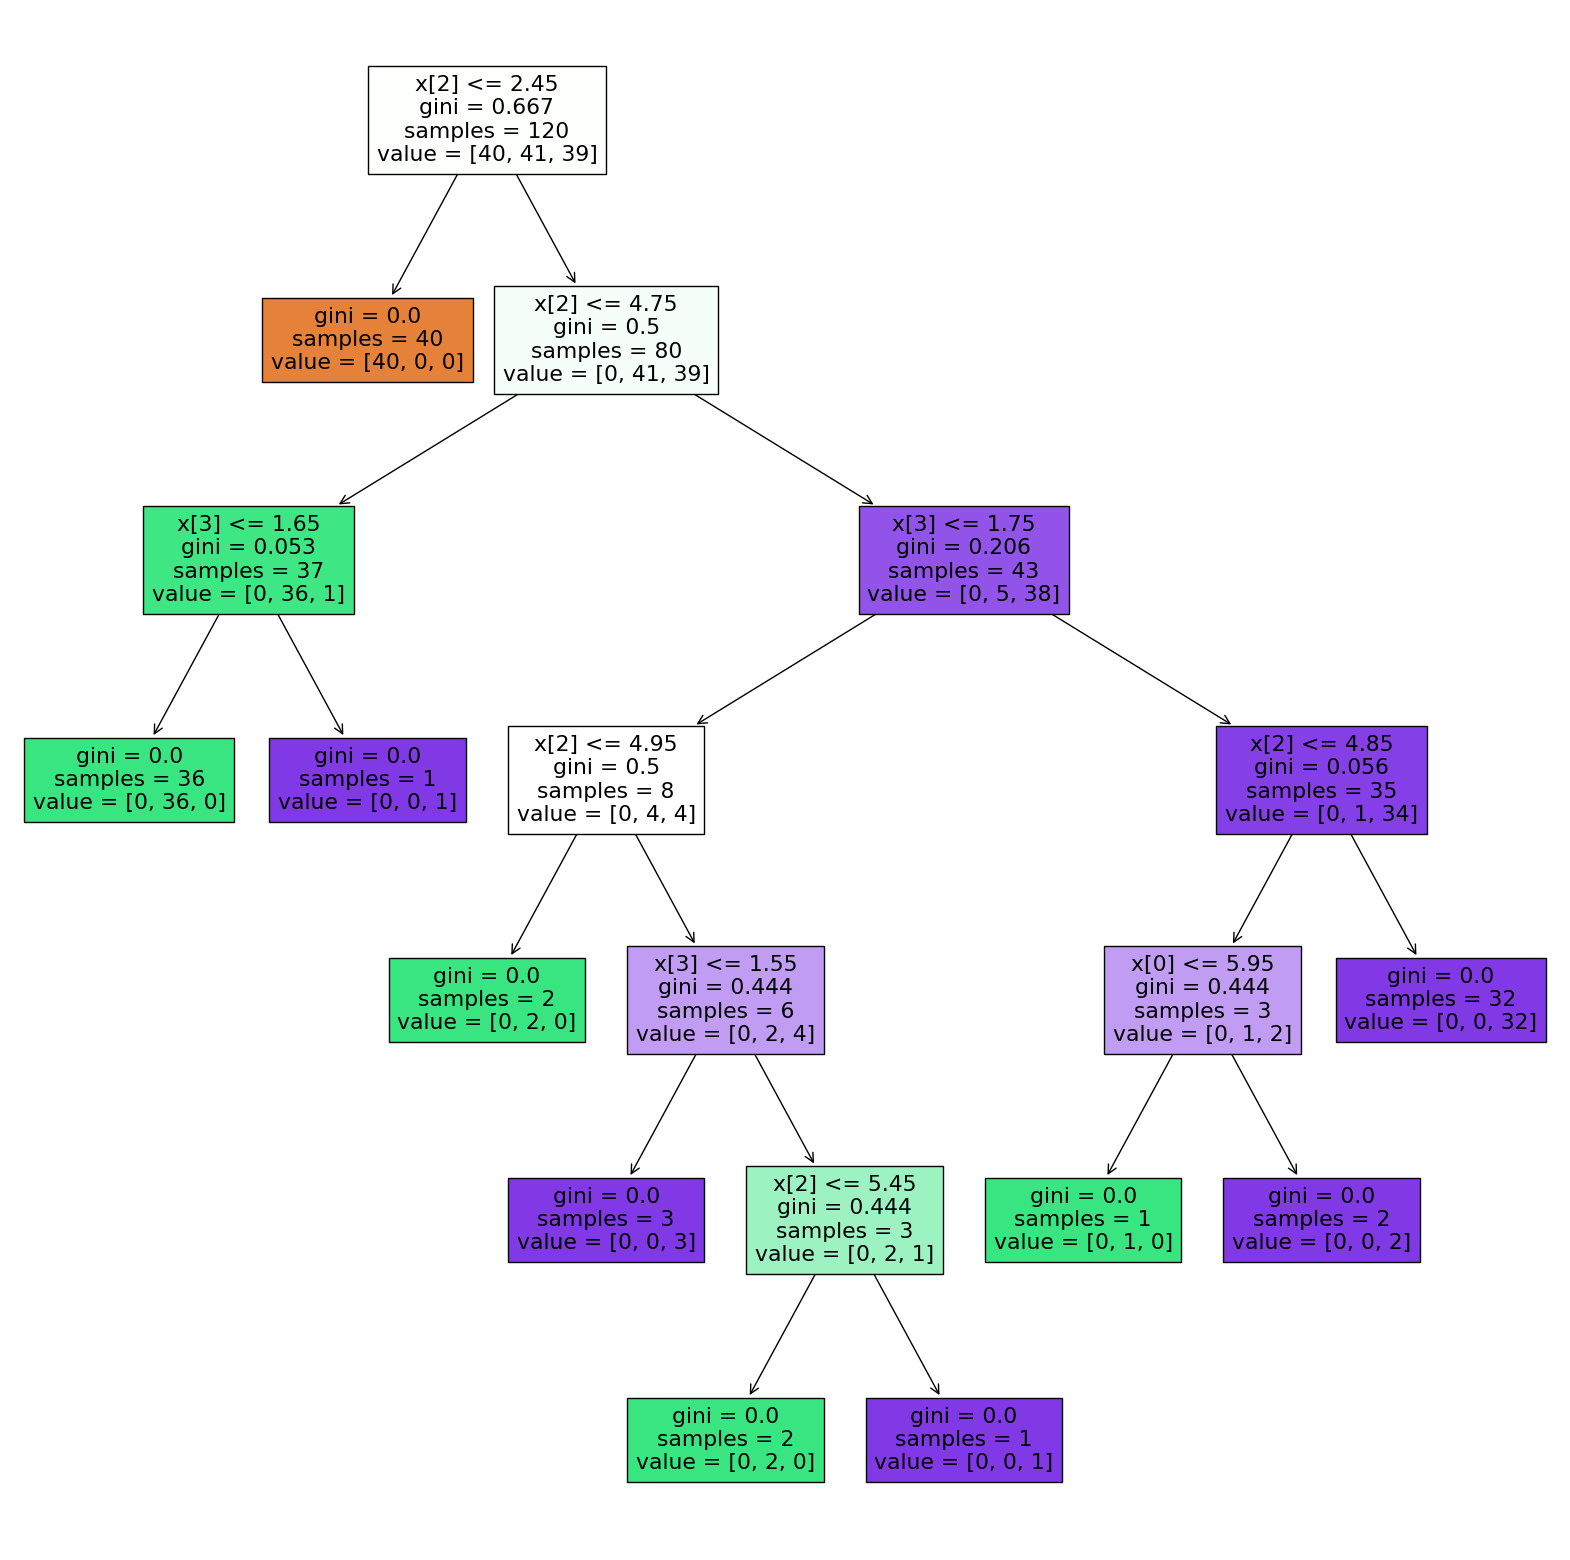

In [12]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          filled=True);

Con estos colores vamos a poder diferenciar las especies, pero no estaría de más que también podamos leer sus nombres.

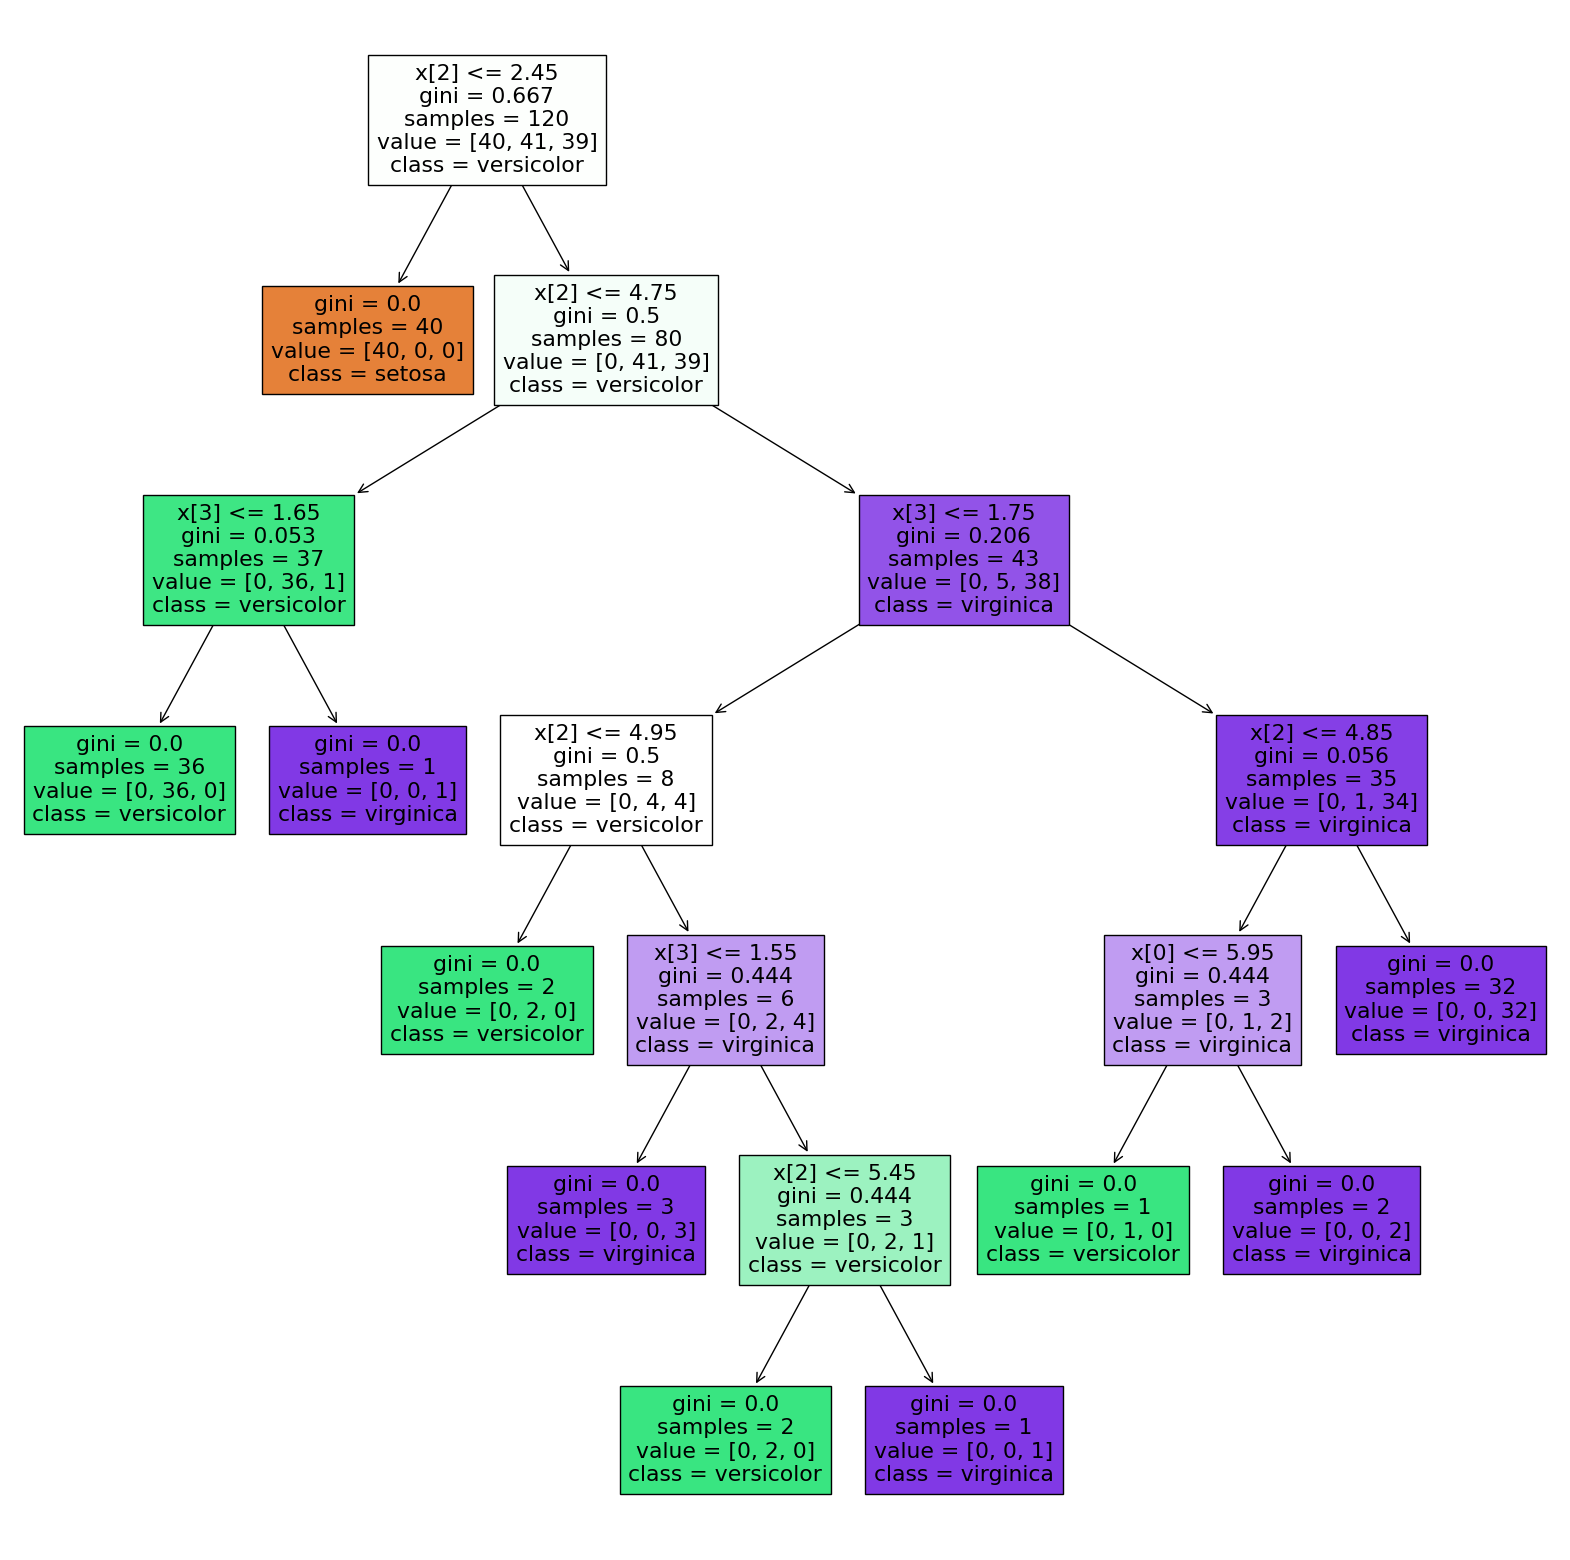

In [13]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          class_names=["setosa", "versicolor", "virginica"],
          filled=True);

Y lo más importante, es que podamos ver al comienzo de cada recuadro, cuál es la decisión que ha tomado en ese punto para dividir los datos, para lo cual sería bueno contar con los nombres de las columnas que se han usado. Eso lo hacemos así:

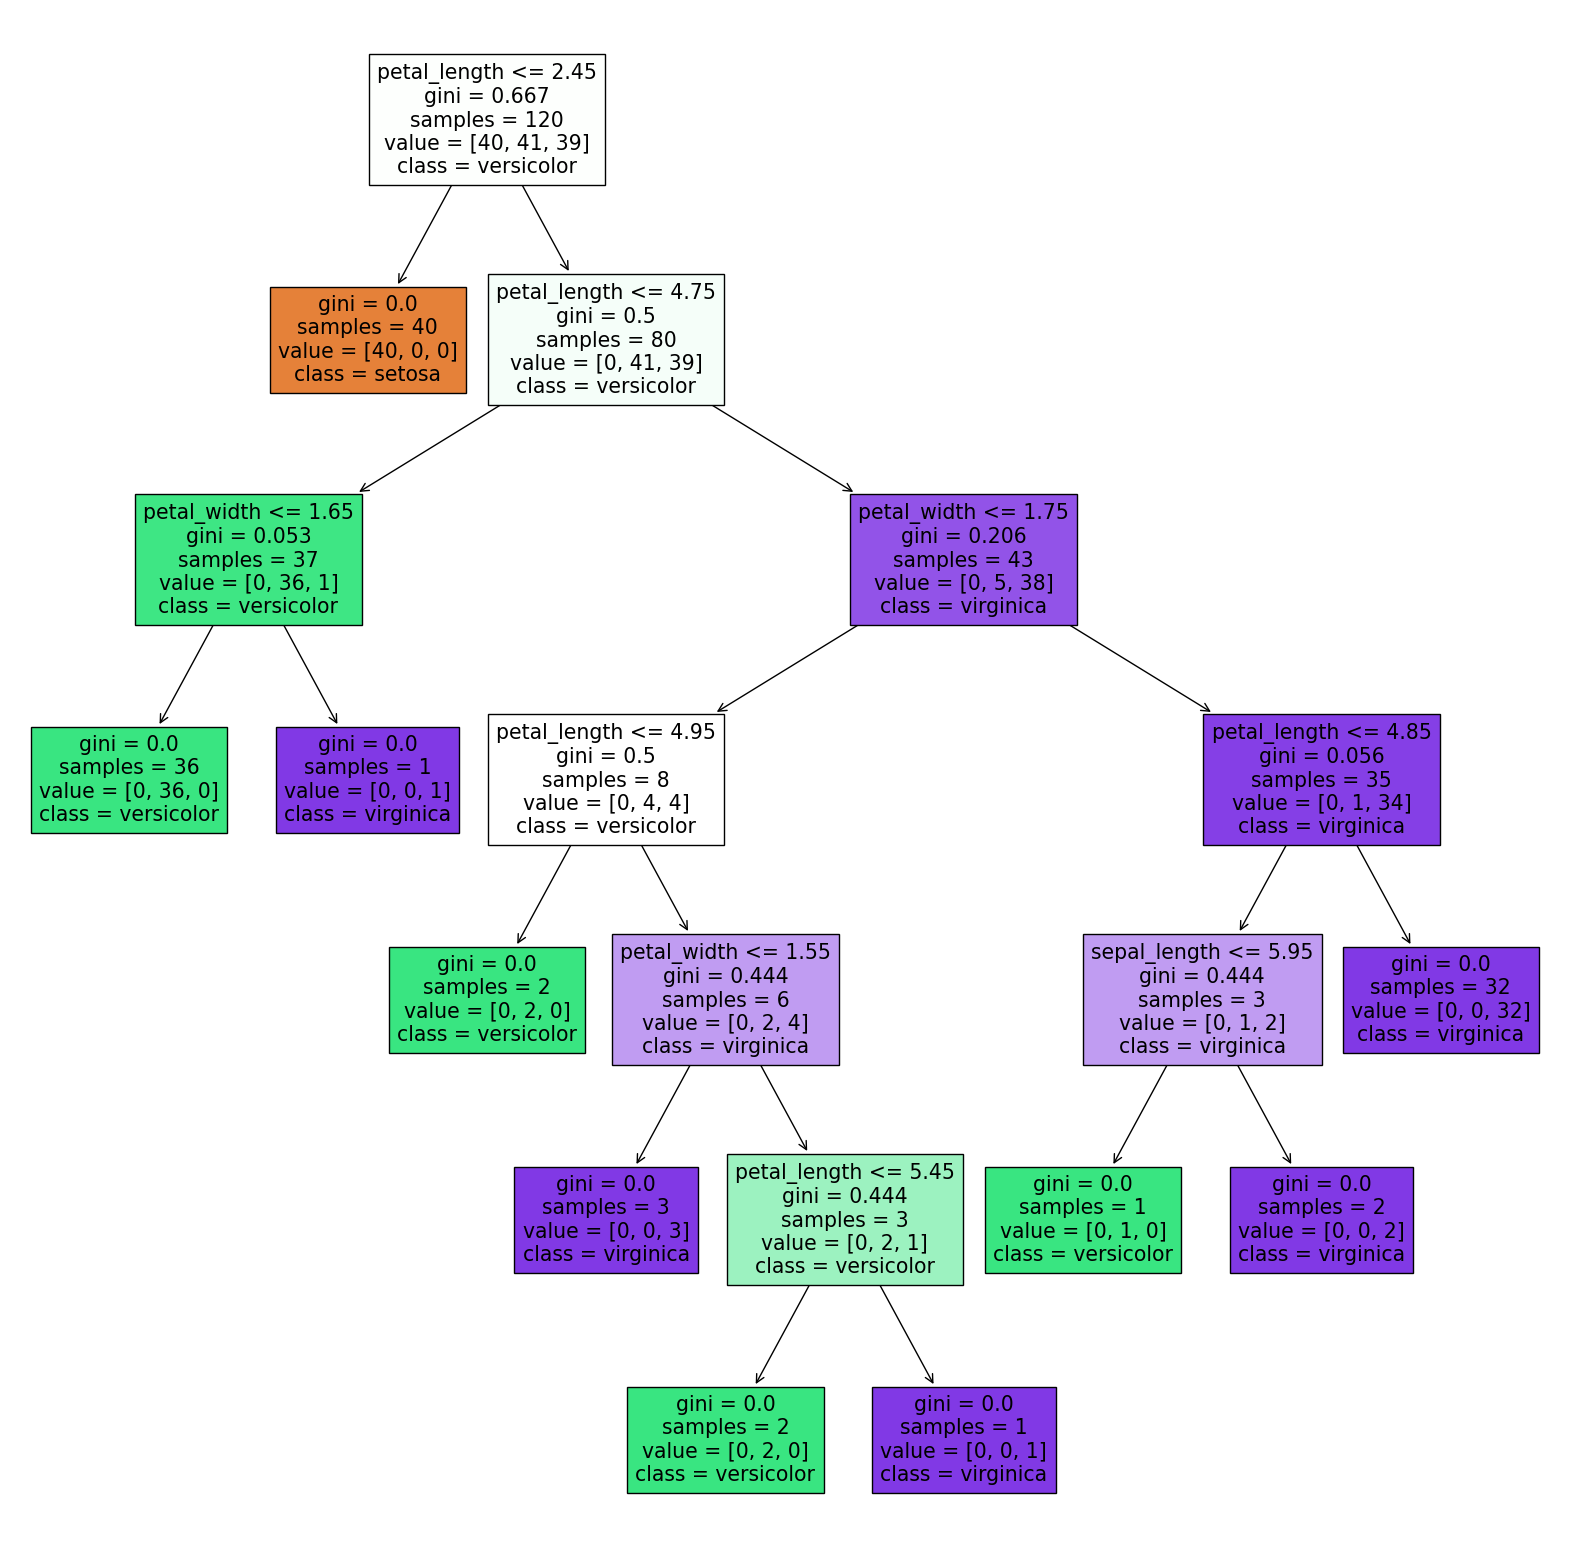

In [14]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          class_names=["setosa", "versicolor", "virginica"],
          feature_names = df.columns.to_list(),
          filled=True);

Ahora sí, nuestro árbol está presentable, y podemos comenzar a interpretar los descubrimientos que ha hecho Machine Learning aquí.


### Interpretación de los Árboles de Decisión

La historia que este gráfico nos cuenta es la siguiente: el modelo ha identificado, que la mejor forma de comenzar a hacerse preguntas para clasificar a nuestras flores, es preguntarnos si el largo de su pétalo es igual o menor a **2.45**, ya que si es así, es áltamente probable que se trate de una flor de la especie *setosa*.

`gini = 0.667`: El coeficiente de Gini mide la impureza del nodo, y por lo tanto qué tan confiable es. Si tuviera un valor de **0** indicaría que es un nodo perfectamente puro (y que todas las muestras en el nodo son de una sola clase). En este caso tenemos un valor de **0.667**, lo cual indica cierto nivel de mezcla de clases en este nodo.

`samples = 120`: Esto indica cuántas muestras han pasado por este nodo. Ya que este es el nodo raíz, naturalmente las 120 muestras del conjunto pasaron por este nodo.

`value = [40, 41, 39]`: Este array muestra cuántas muestras de cada clase están presentes en este nodo. La primera posición del array corresponde a la primera clase ('*setosa*'), la segunda posición a la segunda clase ('*versicolor*'), y la tercera a la tercera clase ('*virginica*'). Así que hay 40 muestras de '*setosa*', 41 de '*versicolor*' y 39 de '*virginica*'.

`class = versicolor`: Este es el resultado de la clasificación en este nodo. Dado que '*versicolor*' es la clase con más muestras en este nodo (aunque por un margen muy pequeño), cualquier muestra que llegue a este punto y no se divida más será clasificada como '*versicolor*'.

En el recuadro que sale hacia la izquierda tenemos 40 muestras que cumplieron con la condición de tener un largo de pétalo igual o menor a *2.45*, de las cuales todas corresponden a la especie setosa, y como puedes ver, este nodo tiene un gini de **0**, por lo tanto es absolutamente confiable.

Las otras 80 muestras cayeron en un nuevo nodo, donde Machine Learning ha identificado que el mejor paso para seguir clasificando las flores es verificando si el largo de sus pétalos es menor o igual a **4.75**. Si esto es así o no, va a ir distribuyendo a cada caso a lo largo de una serie de nuevas preguntas, hasta identificar a qué especies pertenecen.

Como puedes ver, cada una de las hojas finales de nuestro árbol tienen un gini perfecto, por lo que podemos confiar en que nuestro modelo ha aprendido a clasificar las flores de iris con absoluta precisión, y que si el día de mañana traemos una nueva flor y el modelo nos dice que es *versicolor*, tenemos que confiar en que ha acertado.

Este nivel de perfección se debe a que hemos usado una base de datos ficticia y muy controlada. En la vida real es muy difícil encontrar estos niveles de precisión, sino que tendremos que ir definiendo cuáles son los umbrales de confianza que estableceremos para nuestros modelos según el caso.

Estos han sido los **Árboles de Decisión**, y nos queda un algoritmo más para completar los *4 algoritmos* de **Aprendizaje Supervisado**, que son los **Bosques Aleatorios**. 

¿Suena misterioso? No te pierdas la próxima lección.